In [1]:
import pandas as pd
df = pd.read_csv('census-income1.csv')
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
              'marital-status', 'occupation', 'relationship', 'race', 'sex',
              'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  class           32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [2]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
for i in [1,3,5,6,7,8,9,13,14]:
    df[df.columns[i]]= enc.fit_transform(df[df.columns[i]]) 


In [3]:
df['class'].value_counts()

0    24719
1     7841
Name: class, dtype: int64

<AxesSubplot:xlabel='class'>

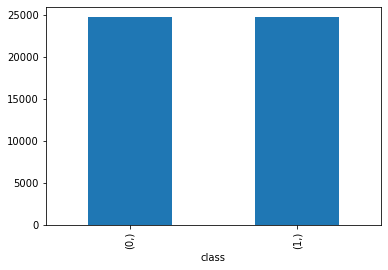

In [4]:
from sklearn.utils import resample
df_majority = df[df['class'] == 0]
df_minority = df[df['class'] == 1]
df_min_up = resample(df_minority, replace = True, n_samples = 24719, random_state = 1)
df_up = pd.concat([df_min_up, df_majority])
df_up.value_counts(['class']).plot.bar()

In [5]:
X = df_up.iloc[:, :-1]
from sklearn import preprocessing
X = preprocessing.scale(X)
y = df_up['class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8366370010787486